In [19]:
%pip install numpy 
%pip install pandas
%pip install numba
%pip install scipy
%pip install matplotlib




Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
from numba import njit
from scipy.integrate import quad
from scipy.special import hermite, factorial
import matplotlib.pyplot as plt
import time


# Conductance Function

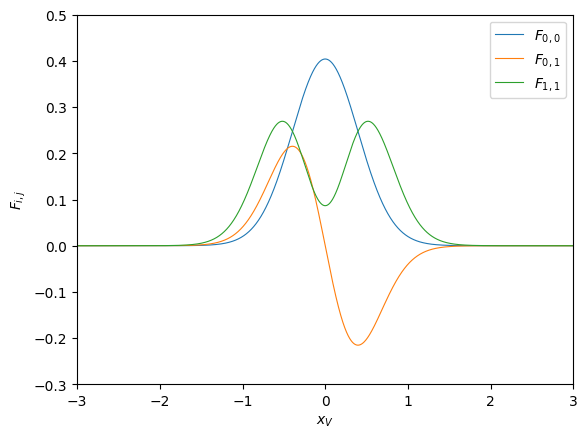

In [4]:
# Plots the conductance functions for each quantum state over a range of x_V values

from Plots import Plot_Conductance_Functions


Plot_Conductance_Functions("Conductance_Functions.csv", "Conductance Functions")


# DC Memristor Simulation

In [5]:
import numpy as np
import pandas as pd
import time

start_time = time.time()

from Calculations import Load_F_Values, Save_Results, Runge_Kutta_Method, Memristor_Deriv, has_reached_equilibrium


def DC_Simulation(V_n, R_n, Z_T, alpha, Omega, Gamma, l, Lambda, x_0, initial_conditions, max_steps, dt, F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min):
    steps_per_check = 10000
    state = np.array(initial_conditions)
    results = []

    for step in range(1, max_steps + 1):
        t = step * dt

        if t % 10000 == 0:
            Time = time.time() - start_time
            print(f"t={t} at Time {Time}")

        state = Runge_Kutta_Method(Memristor_Deriv, t, state, dt, V_n, R_n, Z_T, alpha, Omega, Gamma, l, Lambda, x_0,
                                   F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min)
        results.append([step * dt] + list(state))

        if step % steps_per_check == 0:
            results_array = np.array(results)
            V_values = results_array[:, -1]
            if has_reached_equilibrium(V_values, threshold=1e-7):
                break

    return np.array(results), state


# Parameters for Memristor System
alpha = 1.0
Omega = 7.0
Gamma = 0.1
Z_T = 1.0
Lambda = 0.13
l = 0.5
x_0 = 0.8
R_n = 5.0
V_n = 0.23

Initial_Conditions= [0, 0, 1, 0]
#Initial_Conditions= [0.12396569638120777,0.043274266345808055,0.9823908299140194,0.15596345284021695]
#Initial_Conditions= [-0.010710836167613596,9.529732000075222e-05,0.999913142660738,-0.005220531236939342] #f=7
#Initial_Conditions= [-0.001453856, -4.93E-06, 0.999998411, -0.000726388] #f=50
#Initial_Conditions= [0.10245258666521732,0.08116066494273184,0.9824928552267586,0.15534843628668438] #Conditions after 5000s at dt=0.01
#Initial_Conditions= [-0.013182012239543498,0.1308740579890271,0.9823799258554278,0.15426204905053303] ##Conditions after 1000s at dt=0.0001



dt = 0.001
max_steps = 2000000

# Precompute values
# x_vals, F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min = Load_F_Values("Conductance_Functions.csv")
#
#
# results, current_initial_conditions = DC_Simulation(V_n, R_n, Z_T, alpha, Omega, Gamma, l, Lambda, x_0, Initial_Conditions, max_steps, dt, F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min)
#
# Save_Results(results, f"Memristor/DC-Simulations/DC-Simulation_dt={dt}_t={max_steps*dt}_Vn={V_n}.csv", "Memristor")




end_time = time.time()
total_time = end_time - start_time
print(f"Simulation completed in {total_time:.2f} seconds.")








Simulation completed in 0.03 seconds.


## Bloch Vector Components Phase Space

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ted_l\AppData\Local\Temp\ipykernel_26704\2086801284.py:3: SyntaxWarning: invalid escape sequence '\D'
  Plot_Attractor("Memristor\DC-Simulations\DC-Simulation_dt=0.001_t=2000_Vn=0.23.csv", 0.001, "DC-Memristor Stable Limit Cycle")


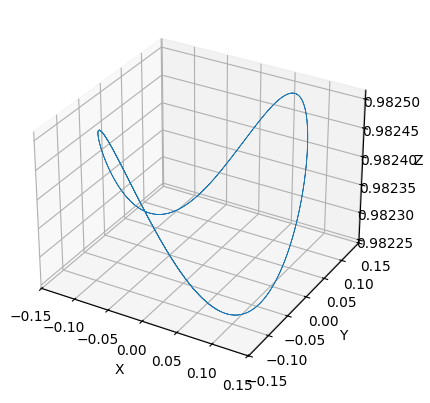

In [7]:
from Plots import Plot_Attractor

Plot_Attractor("Memristor\DC-Simulations\DC-Simulation_dt=0.001_t=2000_Vn=0.23.csv", 0.001, "DC-Memristor Stable Limit Cycle")


## Voltage-Time Plots

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ted_l\AppData\Local\Temp\ipykernel_26704\1133229551.py:3: SyntaxWarning: invalid escape sequence '\D'
  Plot_Voltage_Time("Memristor\DC-Simulations\DC-Simulation_dt=0.001_t=2000_Vn=0.23.csv", 0.003, "DC-Memristor Voltage-Time Plot")


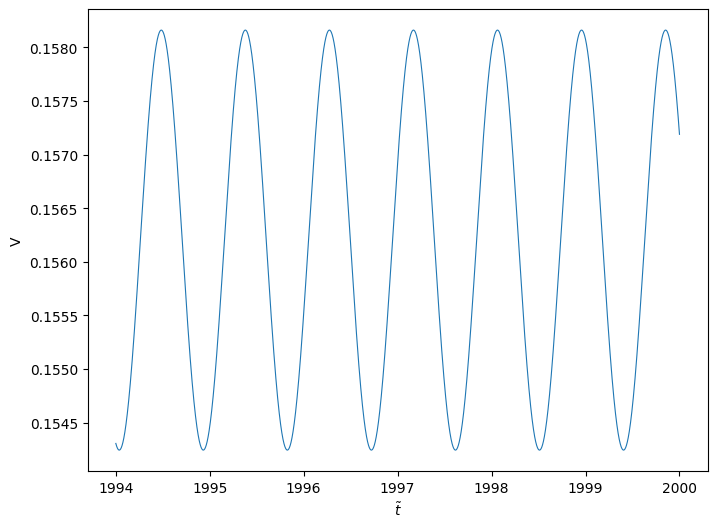

In [8]:
from Plots import Plot_Voltage_Time

Plot_Voltage_Time("Memristor\DC-Simulations\DC-Simulation_dt=0.001_t=2000_Vn=0.23.csv", 0.003, "DC-Memristor Voltage-Time Plot")


# DC Memristor Hysteresis

In [9]:
import numpy as np
import pandas as pd
import time

start_time = time.time()

from Calculations import get_equilibrium_V, Load_F_Values
from Memristor_DC_Simulation import DC_Simulation

# Save for memristor equalibrium V
def save_results_to_csv(Vn_values, V_results_min, V_results_max, filename):
    df = pd.DataFrame({
        "Vn": Vn_values,
        "V_min": V_results_min,
        "V_max": V_results_max
    })
    df.to_csv(filename, index=False)
    print(f"Results saved to {filename}")

# Parameters for Memristor System
alpha = 1.0
Omega = 7.0
Gamma = 0.1
Z_T = 1.0
Lambda = 0.13
l = 0.5
x_0 = 0.8
V_n = 1.0
dVn = 0.01
R_n = 5.0

Initial_Conditions_Memristor = [0, 0, 1.0, 0]

dt = 0.01
max_steps = 100000

# Precompute values
x_vals, F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min = Load_F_Values("Conductance_Functions.csv")


Vn_values_up = np.arange(0.01, 5.01, dVn)
Vn_values_down = np.arange(5, 0.00, -dVn)

V_results_up_min = []
V_results_up_max = []
V_results_down_min = []
V_results_down_max = []


current_initial_conditions = Initial_Conditions_Memristor.copy()

# Forward simulation
# for V_n in Vn_values_up:
#     results, current_initial_conditions = DC_Simulation(V_n, R_n, Z_T, alpha, Omega, Gamma, l, Lambda, x_0, current_initial_conditions, max_steps, dt, F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min)
#     V_min, V_max = get_equilibrium_V(results)
#     V_results_up_min.append(V_min)
#     V_results_up_max.append(V_max)
#     Time = time.time() - start_time

# save_results_to_csv(Vn_values_up, V_results_up_min, V_results_up_max,
#                     f"Memristor/Hysteresis/memristor_inscreasing_dVn={dVn}_dt={dt}.csv")


current_initial_conditions = Initial_Conditions_Memristor.copy()

# Backward simulation
# for V_n in Vn_values_down:
#     results, current_initial_conditions = DC_Simulation(V_n, R_n, Z_T, alpha, Omega, Gamma, l, Lambda, x_0, current_initial_conditions, max_steps, dt, F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min)
#     V_min, V_max = get_equilibrium_V(results)
#     V_results_down_min.append(V_min)
#     V_results_down_max.append(V_max)

# save_results_to_csv(Vn_values_down, V_results_down_min, V_results_down_max,
#                     f"Memristor/Hysteresis/memristor_decreasing_dVn={dVn}_dt={dt}.csv")

end_time = time.time()
total_time = end_time - start_time
print(f"Simulation completed in {total_time:.2f} seconds.")


Simulation completed in 0.00 seconds.
Simulation completed in 0.10 seconds.


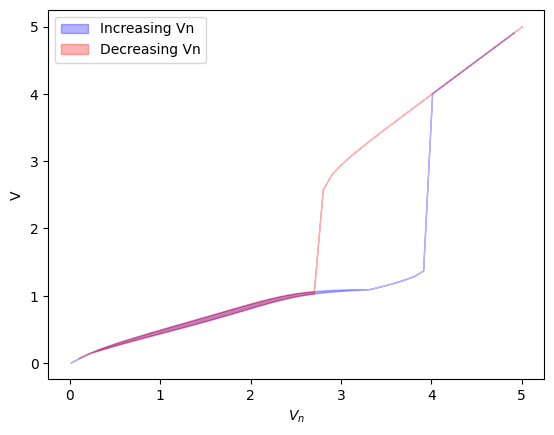

In [10]:
from Plots import plot_hysteresis

plot_hysteresis("Memristor/Hysteresis/memristor_increasing_dVn0.1_dt0.01.csv", "Memristor/Hysteresis/memristor_decreasing_dVn0.1_dt0.01.csv")


# DC Memristor Voltage Oscillation Regions

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import time

from Calculations import get_equilibrium_V, Load_F_Values
from Memristor_DC_Simulation import DC_Simulation


start_time = time.time()

def save_results_to_csv(Vn_values, Rn_values, V_results_min, V_results_max, filename):
    df = pd.DataFrame({
        "Vn": Vn_values,
        "Rn": Rn_values,
        "V_min": V_results_min,
        "V_max": V_results_max
    })
    df.to_csv(filename, index=False)
    print(f"Results saved to {filename}")


# Parameters for Memristor System
alpha = 1.0
Omega = 7.0
Gamma = 0.1
Z_T = 0.3
Lambda = 0.13
l = 0.5
x_0 = 0.8
# V_n = 1.0
# R_n = 5.0


x_vals, F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min = Load_F_Values("Conductance_Functions.csv")

Initial_Conditions_Memristor = [0, 0, 1.0, 0]

dt = 0.01
max_steps = 100000


Vn_values = np.arange(0.1, 60.1, 0.1)
Rn_values = np.arange(0.0, 300.0, 5.0)

V_results_min = []
V_results_max = []
Vn_list = []
Rn_list = []

current_initial_conditions = Initial_Conditions_Memristor.copy()



# for R_n in Rn_values:
#     for V_n in Vn_values:
#         results, current_initial_conditions = DC_Simulation(V_n, R_n, Z_T, alpha, Omega, Gamma, l, Lambda, x_0, current_initial_conditions, max_steps, dt, F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min)
#         V_min, V_max = get_equilibrium_V(results)

#         Time = time.time() - start_time
#         V_n = round(V_n, 1)
#         R_n = round(R_n, 0)
#         Vn_list.append(V_n)
#         Rn_list.append(R_n)
#         V_results_min.append(V_min)
#         V_results_max.append(V_max)
#         # print(f"Rn value {R_n} and Vn is {V_n} and time is {Time:.2f}")
#     print(f"Rn value {R_n} is complete at time {Time:.2f}")

# save_results_to_csv(Vn_list, Rn_list, V_results_min, V_results_max,
#                     "Memristor/Oscillation_Regions/memristor_oscillation_regions_ZT=0.3.csv")
end_time = time.time()
total_time = end_time - start_time
print(f"Simulation completed in {total_time:.2f} seconds.")


Simulation completed in 0.00 seconds.
Simulation completed in 0.19 seconds.


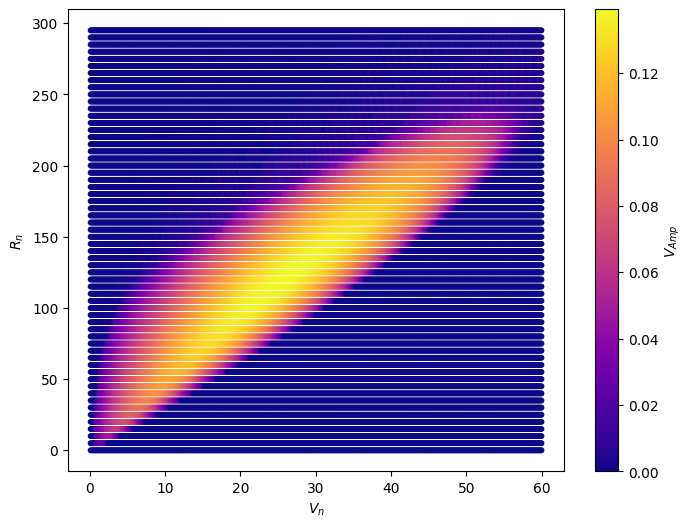

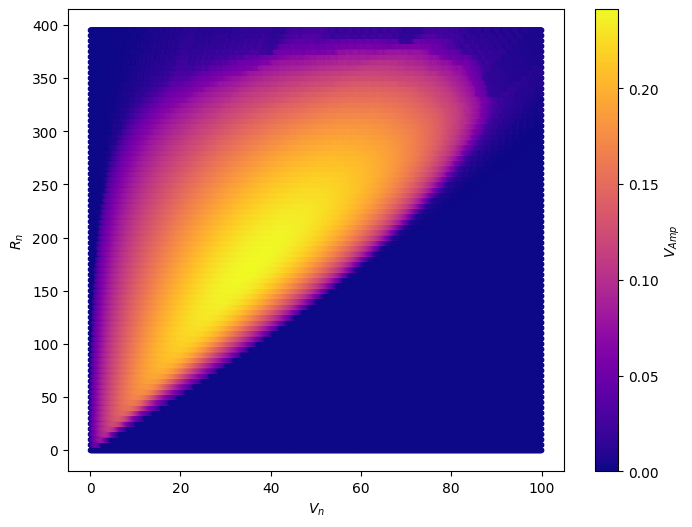

In [ ]:
from Plots import plot_oscillating_points, plot_oscillation_heatmap

#plot_oscillating_points("Memristor/Oscillation_Regions/memristor_oscillation_regions_zT=0.3.csv", threshold=1e-1)
plot_oscillation_heatmap("Memristor/Oscillation_Regions/memristor_oscillation_regions_zT=0.3.csv")

#plot_oscillating_points("Memristor/Oscillation_Regions/memristor_oscillation_regions_Test_zT=0.6.csv", threshold=1e-1)
plot_oscillation_heatmap("Memristor/Oscillation_Regions/memristor_oscillation_regions_Test_zT=0.6.csv")


# Power Spectral Density

<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
C:\Users\ted_l\AppData\Local\Temp\ipykernel_13268\3649261919.py:6: SyntaxWarning: invalid escape sequence '\P'
  plot_log_psd("Memristor\Power_Density_Spectrum\PSD_DC_dt=0.001_t=5000_Vn=0.23.csv", "Normalised Power Spectral Density")


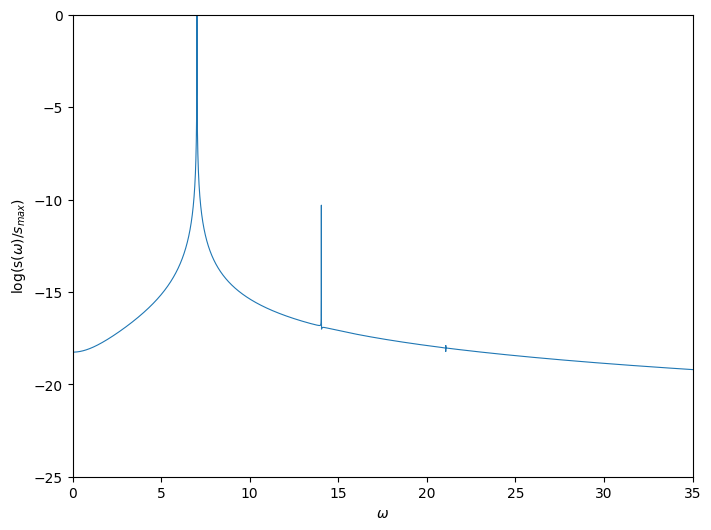

In [ ]:
from Memristor_PSD import Calculate_Normalised_PSD, plot_log_psd

# Calculate_Normalised_PSD("Memristor\DC-Simulations\DC-Simulation_dt=0.01_t=5000_Vn=0.23.csv",
#               "Memristor\Power_Density_Spectrum\PSD_DC_dt=0.001_t=5000_Vn=0.23.csv", data_fraction=0.5, window_type="Hann")

plot_log_psd("Memristor\Power_Density_Spectrum\PSD_DC_dt=0.001_t=5000_Vn=0.23.csv", "Normalised Power Spectral Density")


# AC Memristor Simulation

In [11]:
import numpy as np
import time

from Calculations import Load_F_Values, Save_Results, has_reached_equilibrium, Runge_Kutta_Method, Memristor_Deriv


start_time = time.time()

def AC_Simulation(V_n_func, R_n, Z_T, alpha, Omega, Gamma, l, Lambda, x_0, initial_conditions, max_steps, dt,  F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min):
    steps_per_check = 1000
    state = np.array(initial_conditions)
    results = []

    for step in range(1, max_steps + 1):
        t = step * dt
        V_n = V_n_func(t)

        if t % 10000 == 0:
            Time = time.time() - start_time
            print(f"t={t} at Time {Time}")

        state = Runge_Kutta_Method(Memristor_Deriv, t, state, dt, V_n, R_n, Z_T, alpha, Omega, Gamma, l, Lambda, x_0,  F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min)
        results.append([t] + list(state))

        if step % steps_per_check == 0:
            results_array = np.array(results)
            V_values = results_array[:, -1]
            if has_reached_equilibrium(V_values, threshold=1e-7):
                break

    return np.array(results), state


# Parameters for Memristor System
alpha = 1.0
Omega = 7.0
Gamma = 0.1
Z_T = 1.0
Lambda = 0.13
l = 0.5
x_0 = 0.8
R_n = 5.0
Vn = 0.23
V_amp = 3.8
f = 3.0

def V_n(t):
    return V_amp * np.sin(f * t) + 0.23

Initial_Conditions= [0, 0, 1, 0]
#Initial_Conditions= [0.4900079343682886,-0.08648602168376343,0.5873657793316545,0.6513976208268857]
#Initial_Conditions= [-0.11461458884048435,0.004503840433960565,0.9866533492994785,0.15641842333359982]
#Initial_Conditions= [0.018934737059722984,0.11812715921420408,0.9838812402578854,0.15566436490450694]
#Initial_Conditions= [-0.10256893962406226,-0.18425155831408083,0.9543056702224572,0.17608881274697716]
dt = 0.01
max_steps = 2000000000

# Precompute values
# x_vals, F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min = Load_F_Values("Conductance_Functions.csv")
#
#
# results, current_initial_conditions = AC_Simulation(V_n, R_n, Z_T, alpha, Omega, Gamma, l, Lambda, x_0, Initial_Conditions, max_steps, dt, F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min)
#
# Save_Results(results,
#              f"Memristor/Chaos/Simulation_Tests/AC_Simulation_F={f}_VA={V_amp}_dt={dt}_Vdc={Vn}.csv", "Memristor")


#Standard dt=0.01, t=5000



end_time = time.time()
total_time = end_time - start_time
print(f"Simulation completed in {total_time:.2f} seconds.")


Simulation completed in 0.00 seconds.


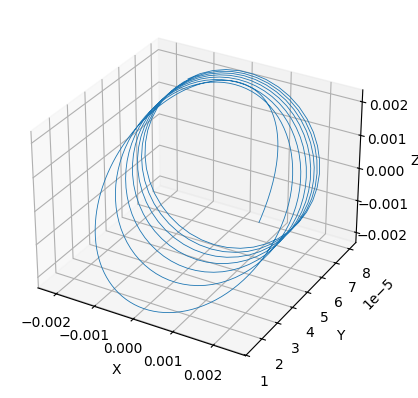

In [12]:
from Plots import Plot_Voltage_Time, Plot_Attractor

# Plot_Voltage_Time("Tests/AC_Simulation_Test_VA=2300_F=6.00_dt=0.0001_Vdc=0.23.csv", 0.01, "AC-Memristor Voltage-Time Plot")

Plot_Attractor("Tests/AC_Simulation_Test_VA=2300_F=6.00_dt=0.0001_Vdc=0.23.csv", 0.0001, "AC-Memristor Phase Space")


## AC-Memristor Synchronisation Sweep

In [13]:
# Libraries
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from Calculations import Load_F_Values, has_reached_equilibrium, Runge_Kutta_Method, Memristor_Deriv
from Memristor_PSD import  FFT_PSD
from Memristor_AC_Simulation import AC_Simulation

start_time = time.time()

def detect_frequency_locking(voltage, dt, drive_omega, tolerance=0.01):
    fs = 1.0 / dt
    num_points = int(1000 / dt)
    voltage_to_analyse = voltage[-num_points:] if len(voltage) >= num_points else voltage
    freqs, raw_psd = FFT_PSD(voltage_to_analyse, fs)
    omega = 2 * np.pi * freqs

    max_psd = np.max(raw_psd)
    psd = raw_psd / max_psd

    dominant_index = np.argmax(psd)
    dominant_omega = omega[dominant_index]
    dominant_drive = np.abs(dominant_omega - drive_omega) < tolerance

    smooth_curve = False
    if dominant_drive:
        drive_index = np.argmin(np.abs(omega - drive_omega))

        smooth_curve = True
        for i in range(drive_index, 2, -1):

            if psd[i] - psd[i - 1] < -1e-9 :
                smooth_curve = False
                print(i)
                break

    force_sync = dominant_drive and smooth_curve

    return dominant_drive, force_sync, dominant_omega


def save_arnold_tongue_to_csv(V_amp_values, freq_values, dominant_flags, force_flags, filename):
    df = pd.DataFrame({
        "V_amp": V_amp_values,
        "Frequency": freq_values,
        "Dominant_Drive": dominant_flags,
        "Forced_Sync": force_flags
    })
    df.to_csv(filename, index=False)
    print(f"Arnold Tongue results saved to {filename}")

def sweep_synchronisation_bf(Vn_base, omega_range, Vamp_range, R_n, Z_T, alpha, Omega, Gamma, l, Lambda, x_0,  initial_conditions, max_steps, dt, F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min, filename, early_stopping=True):
    V_amps = []
    omegas = []
    dominant_flags = []
    force_flags = []

    persistent_state = np.array(initial_conditions)

    for omega_drive in omega_range:
        #found_lock = False
        for V_amp in Vamp_range:
            def V_n(t):
                return V_amp * np.sin(omega_drive * t) + Vn_base

            sim_data, final_state = AC_Simulation(
                V_n, R_n, Z_T, alpha, Omega, Gamma, l, Lambda,
                x_0, persistent_state, max_steps, dt, F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min,
            )

            persistent_state = final_state.copy()

            voltage_signal = sim_data[:, 4]
            dominant_drive, force_sync, dominant_omega = detect_frequency_locking(
                voltage_signal, dt, omega_drive
            )

            V_amps.append(V_amp)
            omegas.append(omega_drive)
            dominant_flags.append(int(dominant_drive))
            force_flags.append(int(force_sync))

            Time = time.time() - start_time
            # print(f"ω_drive={omega_drive:.4f}, V_amp={V_amp:.4f} -> "
            #       f"Dominant={dominant_drive}, Forced_Sync={force_sync}, "
            #       f"dom_ω={dominant_omega:.4f}, time={Time:.2f}s")

            if early_stopping and force_sync:
                print(f"Min forced sync at ω_drive={omega_drive:.2f}, time={Time:.2f}s")
                break

    save_arnold_tongue_to_csv(V_amps, omegas, dominant_flags, force_flags, filename)

def sweep_synchronisation_ad(Vn_base, omega_range, initial_V_amp, dV_coarse, dV_refine, R_n, Z_T, alpha, Omega, Gamma, l, Lambda, x_0, initial_conditions, max_steps, dt, F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min, filename):

    V_amps, omegas, dominant_flags, force_flags = [], [], [], []
    initial_state = np.array(initial_conditions)

    prev_min_vamp = initial_V_amp

    for omega_drive in omega_range:
        V_amp = prev_min_vamp
        # found_sync = False
        min_vamp = None


        while V_amp <= 20.0 and V_amp >= 0.0:
            def V_n(t):
                return V_amp * np.sin(omega_drive * t) + Vn_base

            sim_data, final_state = AC_Simulation(
                V_n, R_n, Z_T, alpha, Omega, Gamma, l, Lambda,
                x_0, initial_state, max_steps, dt,  F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min)
            initial_state = final_state.copy()
            voltage_signal = sim_data[:, 4]

            dominant_drive, force_sync, dominant_omega = detect_frequency_locking(
                voltage_signal, dt, omega_drive
            )

            V_amps.append(V_amp)
            omegas.append(omega_drive)
            dominant_flags.append(int(dominant_drive))
            force_flags.append(int(force_sync))

            Time = time.time() - start_time
            print(f"ω_drive={omega_drive:.4f}, V_amp={V_amp:.4f} -> "
                  f"Dominant={dominant_drive}, Forced_Sync={force_sync}, "
                  f"dom_ω={dominant_omega:.4f}, time={Time:.2f}s")

            if force_sync:
                #found_sync = True
                min_vamp = V_amp
                break
            else:
                V_amp += dV_coarse


        if min_vamp is not None:
            V_amp_refine = min_vamp - dV_refine
            while V_amp_refine > 0:
                def V_n(t):
                    return V_amp_refine * np.sin(omega_drive * t) + Vn_base

                sim_data, final_state = AC_Simulation(
                    V_n, R_n, Z_T, alpha, Omega, Gamma, l, Lambda,
                    x_0, initial_state, max_steps, dt, F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min,
                )
                initial_state = final_state.copy()
                voltage_signal = sim_data[:, 4]

                dominant_drive, force_sync, dominant_omega = detect_frequency_locking(
                    voltage_signal, dt, omega_drive
                )

                V_amps.append(V_amp_refine)
                omegas.append(omega_drive)
                dominant_flags.append(int(dominant_drive))
                force_flags.append(int(force_sync))

                Time = time.time() - start_time
                print(f"ω_drive={omega_drive:.4f}, V_amp={V_amp_refine:.4f} -> "
                      f"Dominant={dominant_drive}, Forced_Sync={force_sync}, "
                      f"dom_ω={dominant_omega:.4f}, time={Time:.2f}s")

                if not force_sync:
                    break
                min_vamp = V_amp_refine
                V_amp_refine -= dV_refine

            prev_min_vamp = min_vamp
        else:
            prev_min_vamp = initial_V_amp

        print(f"ω_drive={omega_drive:.4f}, Min V_amp={prev_min_vamp:.4f}, time={Time:.2f}s")
    save_arnold_tongue_to_csv(V_amps, omegas, dominant_flags, force_flags, filename)




def plot_arnold_tongues(filename):
    data = pd.read_csv(filename)

    mask = (data["Dominant_Drive"] == 1) & (data["Forced_Sync"] == 1)
    filtered_data = data[mask]

    min_vamp_per_freq = filtered_data.groupby("Frequency")["V_amp"].min().reset_index()

    plt.figure(figsize=(8, 6))
    plt.scatter(min_vamp_per_freq["Frequency"], min_vamp_per_freq["V_amp"], c='blue', s=50)
    plt.xlabel('Driving Angular Frequency')
    plt.ylabel('Minimum V_amp for Forced Sync')
    plt.title('Arnold Tongue Diagram (Min V_amp with Forced Synchronisation)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

x_vals, F0_0_arr, F0_1_arr, F1_1_arr, dx, xV_min = Load_F_Values("Conductance_Functions.csv")


# sweep_synchronisation_bf(
#     Vn_base=0.23,
#     omega_range=np.arange(3.0, 11.1, 0.1),
#     Vamp_range=np.arange(0.10, 20.0, 0.1),
#     R_n=5.0,
#     Z_T=1.0,
#     alpha=1.0,
#     Omega=7.0,
#     Gamma=0.1,
#     l=0.5,
#     Lambda=0.13,
#     x_0=0.8,
#     initial_conditions=[0, 0, 1.0, 0],
#     #initial_conditions= [0.10245258666521732,0.08116066494273184,0.9824928552267586,0.15534843628668438],
#     max_steps=200000,
#     dt=0.01,
#     precomputed_F=Load_F_Values("Conductance_Functions.csv"),
#     filename="Arnold_Tongue_Data_Test_3-11_dV=0.1_dF=0csv"
# )

# sweep_synchronisation_ad(
#     Vn_base=0.23,
#     omega_range=np.arange(3.0, 11.1, 0.1),
#     initial_V_amp=3.8,
#     dV_coarse=0.1,
#     dV_refine=0.01,
#     R_n=5.0,
#     Z_T=1.0,
#     alpha=1.0,
#     Omega=7.0,
#     Gamma=0.1,
#     l=0.5,
#     Lambda=0.13,
#     x_0=0.8,
#     initial_conditions=[0, 0, 1.0, 0],
#     max_steps=200000,
#     dt=0.01,
#     F0_0_arr = F0_0_arr,
#     F0_1_arr =F0_1_arr,
#     F1_1_arr = F1_1_arr,
#     dx = dx,
#     xV_min = xV_min,
#     filename="Memristor/Arnold_Tongue/Arnold_Tongue_Data_Test_3-11_adaptive.csv"
# )


end_time = time.time()
print(f"Simulation completed in {end_time - start_time:.2f} seconds.")



Simulation completed in 0.00 seconds.
Simulation completed in 0.09 seconds.


<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ted_l\AppData\Local\Temp\ipykernel_26704\3814403077.py:1: SyntaxWarning: invalid escape sequence '\A'
  plot_arnold_tongues("Memristor\Arnold_Tongue\Arnold_Tongue_Data_Test_3-11_adaptive.csv")
C:\Users\ted_l\AppData\Local\Temp\ipykernel_26704\3814403077.py:3: SyntaxWarning: invalid escape sequence '\A'
  plot_arnold_tongues("Memristor\Arnold_Tongue\Arnold_Tongue_Data_Test_3-21_adaptive.csv")


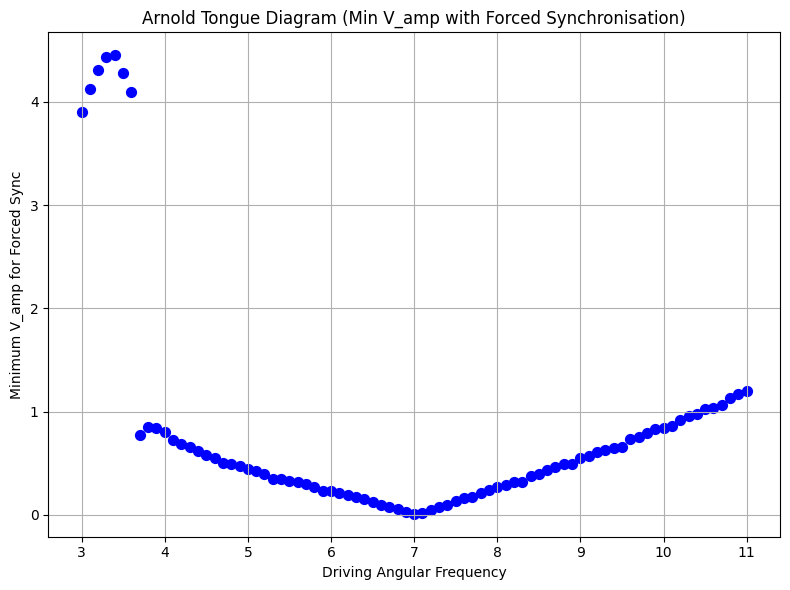

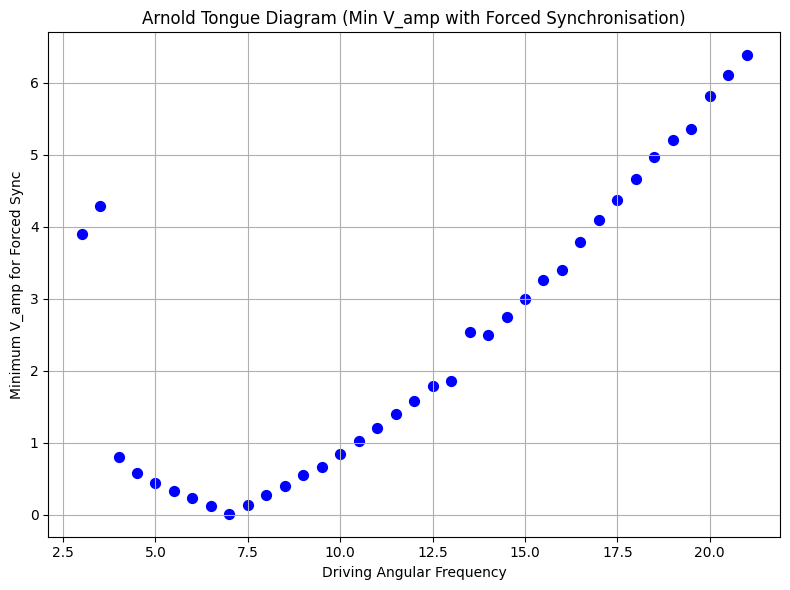

In [14]:
plot_arnold_tongues("Memristor\Arnold_Tongue\Arnold_Tongue_Data_Test_3-11_adaptive.csv")

plot_arnold_tongues("Memristor\Arnold_Tongue\Arnold_Tongue_Data_Test_3-21_adaptive.csv")


<>:5: SyntaxWarning: invalid escape sequence '\A'
<>:7: SyntaxWarning: invalid escape sequence '\A'
<>:9: SyntaxWarning: invalid escape sequence '\A'
<>:5: SyntaxWarning: invalid escape sequence '\A'
<>:7: SyntaxWarning: invalid escape sequence '\A'
<>:9: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ted_l\AppData\Local\Temp\ipykernel_26704\352730991.py:5: SyntaxWarning: invalid escape sequence '\A'
  plot_arnold_tongue("Tests\Arnold_Tongue_Data_PLV_0.2-20.2_dV=0.005_dF=0.2_test.csv")
C:\Users\ted_l\AppData\Local\Temp\ipykernel_26704\352730991.py:7: SyntaxWarning: invalid escape sequence '\A'
  plot_arnold_tongue("Tests\Arnold_Tongue_Data_PLV_1-13_dV=0.005_dF=0.2.csv")
C:\Users\ted_l\AppData\Local\Temp\ipykernel_26704\352730991.py:9: SyntaxWarning: invalid escape sequence '\A'
  plot_arnold_tongue("Tests\Arnold_Tongue_Data_PLV_5-9_dV=0.002_dF=0.05.csv")


Simulation completed in 0.09 seconds.


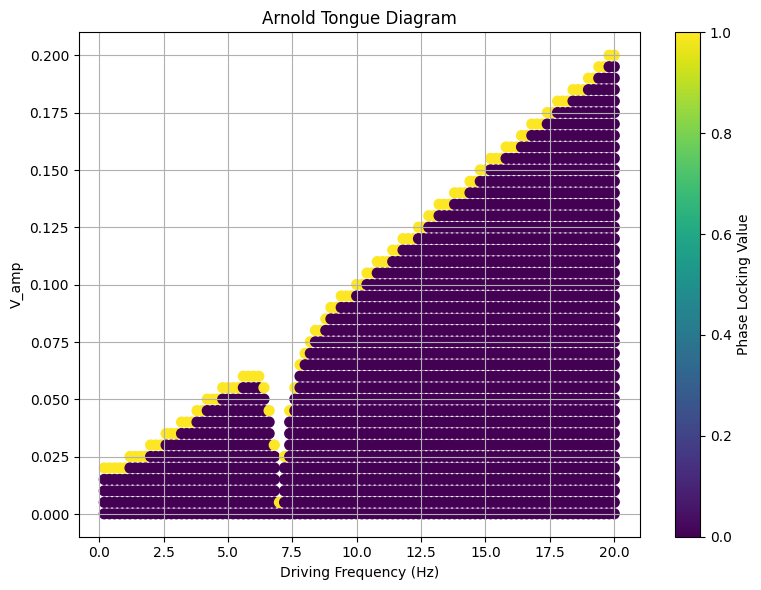

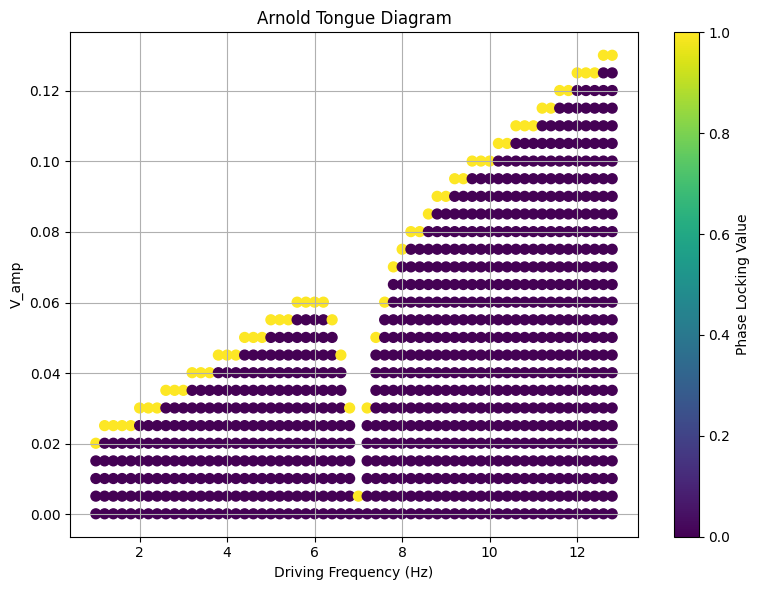

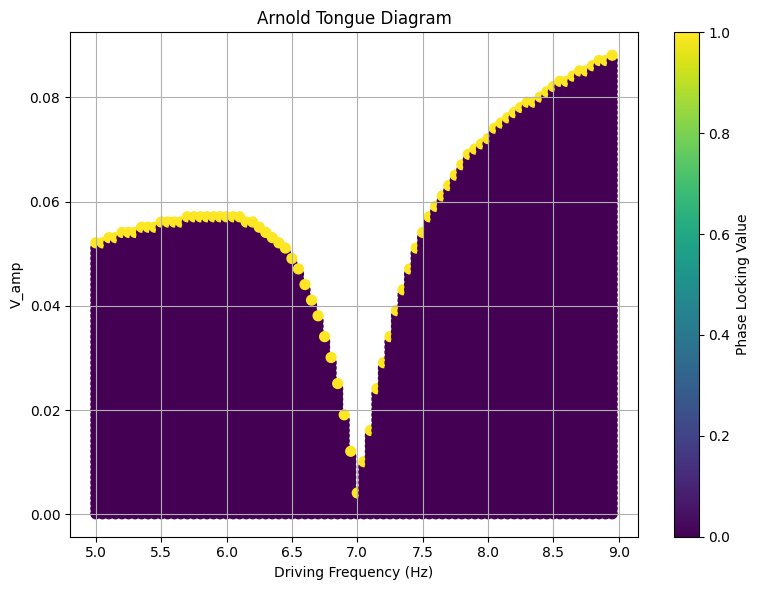

In [15]:
from Memristor_AC_PLV import plot_arnold_tongue

# # plot_arnold_tongue("Tests/Arnold_Tongue_Data-Test-6.csv")

plot_arnold_tongue("Tests\Arnold_Tongue_Data_PLV_0.2-20.2_dV=0.005_dF=0.2_test.csv")

plot_arnold_tongue("Tests\Arnold_Tongue_Data_PLV_1-13_dV=0.005_dF=0.2.csv")

plot_arnold_tongue("Tests\Arnold_Tongue_Data_PLV_5-9_dV=0.002_dF=0.05.csv")

# plot_arnold_tongue("")



<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:7: SyntaxWarning: invalid escape sequence '\C'
C:\Users\ted_l\AppData\Local\Temp\ipykernel_16776\2197761733.py:4: SyntaxWarning: invalid escape sequence '\A'
  plot_log_psd("Memristor\Arnold_Tongue\Min_Forced_Sync\PSD\PSD_AC_F=6.0_VA=0.23_Vdc=0.23.csv", "Normalised Power Spectral Density")
C:\Users\ted_l\AppData\Local\Temp\ipykernel_16776\2197761733.py:7: SyntaxWarning: invalid escape sequence '\C'
  plot_log_psd("Memristor\Chaos\PSD\PSD_AC_F=6.0_VA=0.12_Vdc=0.23.csv", "Normalised Power Spectral Density")


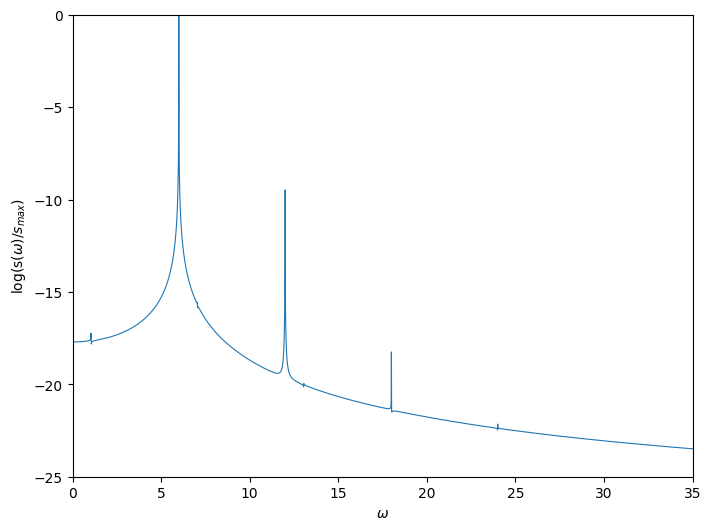

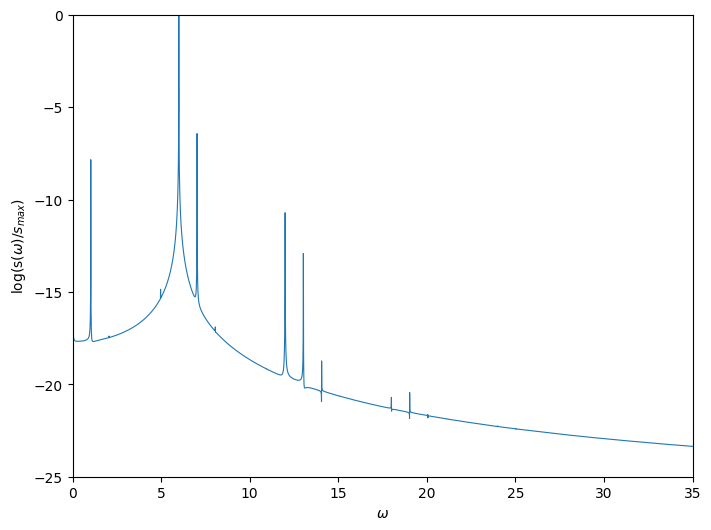

In [ ]:
from Memristor_PSD import  plot_log_psd

# From PSD: Dominant frequency and smoth curve check
plot_log_psd("Memristor\Arnold_Tongue\Min_Forced_Sync\PSD\PSD_AC_F=6.0_VA=0.23_Vdc=0.23.csv", "Normalised Power Spectral Density")

# From PLV
plot_log_psd("Memristor\Chaos\PSD\PSD_AC_F=6.0_VA=0.12_Vdc=0.23.csv", "Normalised Power Spectral Density")


<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ted_l\AppData\Local\Temp\ipykernel_26704\4112504286.py:3: SyntaxWarning: invalid escape sequence '\A'
  plot_log_psd("Memristor\Arnold_Tongue\2to1_Sync_Test\PSD\PSD_AC_F=14.0_VA=0.05_Vdc=0.23.csv", "Normalised Power Spectral Density")


OSError: [Errno 22] Invalid argument: 'Memristor\\Arnold_Tongue\x02to1_Sync_Test\\PSD\\PSD_AC_F=14.0_VA=0.05_Vdc=0.23.csv'